<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Naive Bayes Classifier
- Linear Discriminant Analysis

<hr/>

<h1><font color="darkblue">Group Project</font></h1>

  - Project Groups (5 or 6 students per group) assigned: Check Blackboard, **contact your project partners**!
  - Project proposal (2 paragraphs) due on **October 25**.

### Recall: Classification

Examples for classification tasks:
  - Detect spam e-mails: Given e-mail, spam yes/no?
  - Serological COVID-19 test: Patient previously infected yes/no?
  - Recognize digit from image data

Based on a **training set** of labeled points, assign _class labels_ to unknown vectors in the **query/test set**.  

> **Training set**
><br><br>
>$T = \big\{ (x_i, y_i) \big\}$ where $x_i\in \mathbb{R}^d$ and $y_i$ is the known class membership.
The class if also often called **label** or **category**.
>  - The classes/labels $y_i$ can take only a (small) number of discrete values.

Examples:  
   - Spam emails: $y_i \in \{0, 1\}$ (**binary classification**): $0$ if no spam, $1$ if spam. <br>
   - Digits: $y_i \in \{0,1,2,3,4,5,6,7,8,9\}$ (**multiclass classification**)
 

> **Query/Test set**
><br><br>
>$Q = \big\{ x_i \big\}$ where $x_i\in \mathbb{R}^d$.

### Classification Methods

- $k$-NN
- **Naive Bayes**
- **Linear Discriminant Analysis**

## $k$ Nearest Neighbors

- Assign label/class based on the **$k$ nearest neighbors** ($k$-NN) in the training set, where $k \in \mathbb{N}$ that is fixed. Assume there are $D$ different labels/classes.

> <br>
> <img src="files/KnnClassification.svg" width=200>

**Input:** $\{x_1,\ldots,x_n\}$ are predictor vectors of training set, training labels $(y_1,\ldots,y_n)$, predictor vector $x$ of sample to be classified, parameter $k$.

Define define label $y = y_{j^*}$ for $x$, where

> $$ j^* = \operatorname{argmax}_{j = 1}^K \left\{ \sum_{i=1}^k w_{\pi_i(x)} I_j\left(\pi_i(x)\right)  \right\},$$

and $I_j\left(\pi_i(x)\right) = 1$ if $\pi_i(x)$ has label $y_j$ and $0$ otherwise, for each class $j =1,\ldots,K$.

Here, for each $i=1,\ldots,k$, $\pi_i(x)$ is index of $i$-th closest vector $x_i$ of $x$ among $\{x_1,\ldots,x_n\}$, and $w_{\pi_i(x)}$ are **weights**.

In [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html):
  - If `weights='uniform'` (is default): Always $w_{\pi_i(x)} = 1$.
  - If `weights='distance'`: $w_{\pi_i(x)} =  \dfrac{1}{\|x - \pi_i(x)\|} $  for each $i=1,\ldots, k$.

In [13]:
from sklearn import datasets
iris = datasets.load_iris()

def classification_map(X,y,classifier,i=0,j=1,X_test=None,y_test=None,h=0.1):
    '''
    h: step size in the mesh
    i: first feature number to be plotted
    j: second feature number to be plotted
    '''
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
    cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
# Points in a mesh of [x_min, m_max] x [y_min, y_max]
    x_min, x_max = X[:,i].min()-1, X[:,i].max()+1
    y_min, y_max = X[:,j].min()-1, X[:,j].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    classifier.fit(X,y)
    Z = classifier.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
    # Plot also the training points
    plt.scatter(X[:,i], X[:,j], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with classifier "+str(classifier))
    if not X_test is None and not y_test is None: # if test set features are provided, overlay classified labels on test set as well
        plt.scatter(X_test[:,i], X_test[:,j], c=y_test,cmap=cmap_bold,marker="x")
    ax=plt.gca()
    ax.legend(["training data","test data"],loc=0,fontsize=8)
    
    return fig

In [12]:
grid = np.c_[xx.ravel(), yy.ravel()]

NameError: name 'xx' is not defined

In [14]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.90,stratify=y)

In [ ]:
iris

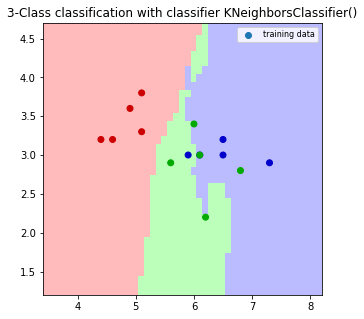

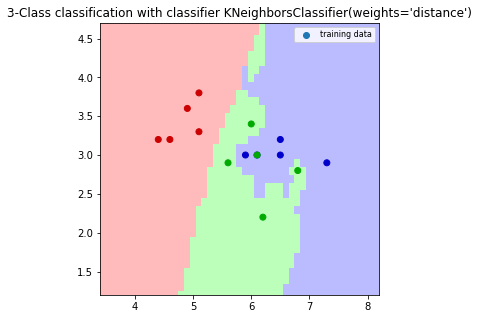

In [15]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k = 5
features = [0,1]
for weights in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=k,weights=weights)
    classification_map(X_train[:,features],y_train,knn)

<h1><font color="darkblue">Naive Bayes Classifier</font></h1>

Uses ideas from Bayesian inference.

Given **data** $D = \big\{\mathbf{x}_i\big\}_{i=1}^n$, suppose there are class labels $\{c_1,\ldots,c_K\}$. By [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem),

>$\displaystyle p(c_k \lvert D) = \frac{p(c_k)\,p(D \lvert c_k)}{p(D)} = \frac{\pi(c_k)\,{\cal{}L}\!_D(c_k)}{Z} .$ 

- **Prior** $\pi(c_k)$: Encodes belief about distribution of class labels $c_k$.
- **Likelihood function** ${\cal{}L}\!_D(c_k)$: Joint probability distribution of data $D$, given class label $c_k$.
- **Posterior** $p(c_k \lvert D)$: Probability that data $D$ has class label $c_k$.

Normalization factor ("**evidence**") $\displaystyle Z = \sum_{k=1}^K \pi(c_k)\,{\cal{}L}\!_D(c_k) $ of does not need to be computed.

For a feature vector $\mathbf{x} = (x_1, \ldots ,x_d) \in \mathbb{R}^d$, the probability of the label class $c_k$ is

>$\displaystyle p(c_k \lvert \mathbf{x}) = \frac{\pi(c_k)\,{\cal{}L}\!_\mathbf{x}(c_k)}{Z} .$ 

### Bayes classifier

Choose class label $c_{k^*}$ such that _posterior is maximized_:

> $$ k^* = \operatorname{argmax}_{k=1}^K \left\{ \pi(c_k)\,{\cal{}L}\!_\mathbf{x}(c_k) \right\} $$

**Questions:**
   - How to choose prior $\pi(c_k)$?
   - How to choose likelihood function ${\cal{}L}\!_\mathbf{x}(c_k)$?

### Key assumption of **naive** Bayes classifier

Assume _naively_ that the **features** $x_1,\ldots, x_d$ **are independent**!

- Thus, likelihood such that

>$\displaystyle {\cal{}L}_{\!\boldsymbol{x}}(c_k) = p(\mathbf{x} | c_k) = \prod_{j=1}^{d} p(x_{j} \lvert c_k)$

## Gaussian Naive Bayes

- Assume marginal likelihoods $p(x_{j} \lvert c_k)$ are **Gaussian**, 

>$\displaystyle p(x_{j} \lvert c_k) = G(x_{j};\mu_{k,j}, \sigma^2_{k,j})$

where $G(x_{j};\mu_{k,j}, \sigma^2_{k,j})$ is PDF of Gaussian with mean $\mu_{k,j}$ and variance $\sigma^2_{k,j}$, evaluated at $x_{j}$.
<br>

- As $\mu_{k,j}$ and $\sigma^2_{k,j}$, we use the sample mean and the sample variance of all features for each class $k$, respectively.

## Choice of prior 

- Pick _prior_ $\pi_k = \pi(c_k)$ for the classes $c_1,\ldots, c_K$:

>  -  Use **uniform prior**:
    > $$\pi_k = \dfrac{1}{K}$$ 
or

>  -  Use **sample-weighted prior**: For each $k=1,\ldots,K$, search for
    > $$\pi_k = \dfrac{|C_k|}{\sum_{i=1}^K |C_i|} = \dfrac{|C_k|}{n} $$.

$|C_k|$: Number of data samples in $D$ that have label $c_k$.
$n$: total number of data samples

### Naive Bayes: Estimation

- Look for maximum of the posterior, i.e.,

$$ k^* = \operatorname{argmax}_{k=1}^K \left\{ \pi(c_k)\,{\cal{}L}\!_\mathbf{x}(c_k) \right\} $$

For Gaussian Naive Bayes:

>$\displaystyle k^* =  \mathrm{arg}\max_k \left[ \pi_k \prod_{j=1}^d G(x_{j};\mu_{k,j}, \sigma^2_{k,j})\right]$ 


In [6]:
# unique known classes in training set
classes = np.unique(iris.target)

In [7]:
print ('There are %d classes:' % len(classes), classes)
# calculate feature means and variances for each class, and the prior
param = dict()  # we save them in this dictionary
data = iris.data.copy()
for k in classes:
    members = (iris.target == k) # boolean array
    num = members.sum()    # True:1, False:0
    prior = num / iris.target.size
    XX = data[members,:] # slice out members
    mu = XX.mean(axis=0)      # calc mean
    Xtilde = XX - mu
    var = (Xtilde*Xtilde).sum(axis=0) / (X.shape[0]-1)
    param[k] = (num, prior, mu, var) # save results
    print (k, mu, var)

There are 3 classes: [0 1 2]
0 [5.006 3.428 1.462 0.246] [0.0408604  0.04725369 0.00991812 0.00365235]
1 [5.936 2.77  4.26  1.326] [0.08761879 0.03238255 0.07261745 0.0128604 ]
2 [6.588 2.974 5.552 2.026] [0.13297181 0.03420268 0.10016644 0.02480671]


In [8]:
# init predicted values
k_pred = -1 * np.ones(iris.target.size)

# evaluate posterior for each point and find maximum
for i in range(iris.target.size):
    pmax, kmax = -1, None   # initialize to nonsense values
    for k in classes:
        num, prior, mu, var = param[k]
        diff = iris.data[i,:] - mu
        d2 = diff*diff / (2*var)
        p = prior * np.exp(-d2.sum()) / np.sqrt(np.prod(2*np.pi*var))
        if p > pmax:
            pmax = p
            kmax = k
    k_pred[i] = kmax

print("Number of mislabeled points out of a total %d points : %d"
      % (iris.target.size, (iris.target!=k_pred).sum()))

Number of mislabeled points out of a total 150 points : 7


In [11]:
iris.data[1,:]

array([4.9, 3. , 1.4, 0.2])

The scikit-learn implementation of Gaussian naive Bayes can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB).

In [11]:
# run sklearn's version - read up on differences if interested
from sklearn.naive_bayes import GaussianNB

In [13]:
gnb = GaussianNB()

y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)

print("Number of mislabeled points out of a total %d points : %d"
      % (iris.target.size, (iris.target!=y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [14]:
# same results from both methods?
np.alltrue(k_pred==y_pred)

False

In [10]:
# class probabilities
probas = gnb.predict_proba(iris.data)

print(probas[1:10,:] , probas[-10:,:] )

[[1.00000000e+00 1.51480769e-17 2.34820051e-25]
 [1.00000000e+00 1.07304179e-18 2.34026774e-26]
 [1.00000000e+00 1.46619543e-17 2.95492722e-25]
 [1.00000000e+00 4.53291917e-19 2.88389975e-26]
 [1.00000000e+00 1.49094245e-14 1.75752068e-21]
 [1.00000000e+00 1.10262691e-17 2.71144689e-25]
 [1.00000000e+00 6.53644612e-18 2.77336308e-25]
 [1.00000000e+00 9.42227052e-18 1.20443161e-25]
 [1.00000000e+00 3.42348334e-18 1.20750647e-25]] [[8.02061979e-223 5.01446576e-009 9.99999995e-001]
 [3.87252859e-187 4.67798053e-007 9.99999532e-001]
 [1.06947698e-152 2.50121636e-002 9.74987836e-001]
 [7.07688248e-234 4.42556022e-009 9.99999996e-001]
 [3.56898830e-237 1.64602693e-010 1.00000000e+000]
 [1.56556628e-191 5.85507962e-007 9.99999414e-001]
 [1.06062035e-149 2.54457623e-002 9.74554238e-001]
 [7.98859322e-168 3.70166862e-004 9.99629833e-001]
 [1.44378562e-199 2.46020435e-007 9.99999754e-001]
 [3.25988243e-146 5.60050092e-002 9.43994991e-001]]


Note: We tested the method with _the same data_ as used in training.

### Pros and Cons

- Features are automatically treated correctly relative to each other

> For example, measuring similar things in different units? 1m vs 1mm
><br><br>
> The estimated mean and variance puts them on a meaningful scale

- Independence is a strong assumption and for no good reason

> Actually... it helps with the computational cost!

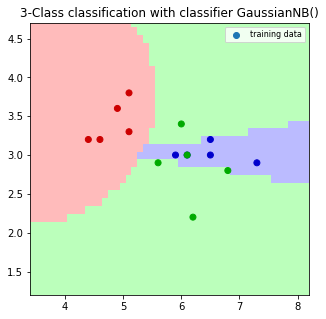

In [17]:
import matplotlib.pyplot as plt
features = [0,1]
classification_map(X_train[:,features],y_train,gnb)
plt.show()

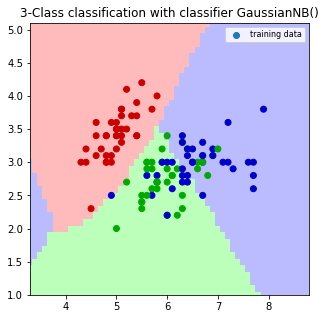

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.25,stratify=y)
classification_map(X_train[:,features],y_train,gnb)
plt.show()

### Exercise: Gaussian Naive Bayes

- Use the provided [training](files/Class-Train.csv) and [query](files/Class-Query.csv) sets to perform classification

> **Training** set consists of 3 columns of ($x_i$, $y_i$, $C_i$)

> **Query** set only has 2 columns of ($x_i$, $y_i$)


Recall likelihood ${\cal{}L}_{\!\boldsymbol{x}}(c_k)$ in Naive Bayes:

$$ {\cal{}L}_{\!\boldsymbol{x}}(c_k) =  \prod_{j=1}^{d} p(x_{j} \lvert c_k) = \prod_{j=1}^{d} G(x_{j};\mu_{k,j}, \sigma^2_{k,j}),$$

where $G(x_{j};\mu_{k,j}, \sigma^2_{k,j})$ univariate Gaussian with mean $\mu_{k,j}$ and variance $\sigma^2_{k,j}$.
<br><br>
If data set $D = \big\{\mathbf{x}_i\big\}_{i=1}^n$ with class labels $\big\{y_i\big\}_{i=1}^n$ in $\{c_1,\ldots,c_K\}$ and class sizes of $|C_1|,\ldots,|C_K|$, we estimate 
>  $$ \mu_{k,j} = \frac{1}{|C_k|} \sum_{i: y_i = c_k} (\mathbf{x}_i)_j $$ and
>  $$ \sigma^2_{k,j} = \frac{1}{|C_k|}  \sum_{i: y_i = c_k} \left( (\mathbf{x}_i)_j - \mu_{k,j} \right)^2 $$
for each $k=1,\ldots, K$ and each $j=1,\ldots, d$.

<h1><font color="darkblue">Linear Discriminant Analysis</font></h1>

Different approach for **Linear Discriminant Analysis (LDA)**:

Assume likelihood is **multivariate Gaussian** with common covariance matrix $\Sigma$, i.e.,
>$\displaystyle {\cal{}L}_{\!\boldsymbol{x}}(c_k) =  G(\boldsymbol{x};\mu_k, \Sigma)$.
><br><br>
> Full covariance matrix $\Sigma$,
> handles correlated features well.

In **LDA**: 
  - Choose $\Sigma$ such that the _discrimination between different classes_ is maximized. 
  - Linear decision boundary

In order to compute $\Sigma$:
  - In one-dimensional case of $d=1$: <br>
$\Sigma = \sigma$ can be computed by

> $$ \sigma^2 = \frac{1}{n-K} \sum_{k=1}^K \sum_{i: y_k = c_k} (x_i - \mu_k)^2,$$ 

    with $\mu_k$ as above.
  - If $d > 1$: Singular value decomposition (SVD) of within-class scatter matrix and between-class scatter matrix.
  
Properties of LDA:
> Fewer parameters than in Naive Bayes to estimate during the learning process
><br><br>
> Good, if we don't have enough data, for example...

In scikit-learn: Implementation [sklearn.discriminant_analysis.LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis).

In [19]:
# apply LDA to Iris data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train[:,features], y_train)
# predict target
LDA_preds = LDA_model.predict(X_test[:,features])
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.target.size, (iris.target!=y_pred).sum()))
# check results
print('The (training) accuracy for LDA model prediction (using',np.size(features),'features) is: ', accuracy_score(LDA_model.predict(X_train[:,features]),y_train))
print('The (test) accuracy for LDA model prediction (using',np.size(features),'features) is: ', accuracy_score(LDA_preds,y_test))

Number of mislabeled points out of a total 150 points : 6
The (training) accuracy for LDA model prediction (using 2 features) is:  0.8035714285714286
The (test) accuracy for LDA model prediction (using 2 features) is:  0.8421052631578947


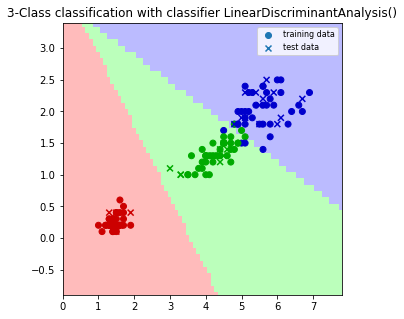

In [24]:
features_new = [2,3]
classification_map(X_train[:,features_new],y_train,LDA_model,X_test=X_test[:,features_new],y_test=y_test)
plt.show()

This visualized the fact that LDA has **linear decision boundaries**!

In [15]:
vars(LDA_model)

{'solver': 'svd',
 'shrinkage': None,
 'priors': None,
 'n_components': None,
 'store_covariance': False,
 'tol': 0.0001,
 'n_features_in_': 2,
 'classes_': array([0, 1, 2]),
 'priors_': array([0.33928571, 0.33035714, 0.33035714]),
 '_max_components': 2,
 'means_': array([[3.42631579, 0.24736842],
        [2.77567568, 1.34054054],
        [2.94864865, 2.00810811]]),
 'xbar_': array([3.05357143, 1.19017857]),
 'explained_variance_ratio_': array([0.98883965, 0.01116035]),
 'scalings_': array([[-1.83216673,  2.66002662],
        [ 5.10893531,  0.8539464 ]]),
 'intercept_': array([-15.25279877,   2.85156483, -16.70470347]),
 'coef_': array([[ 10.57217202, -27.93836335],
        [ -3.96506984,   6.00425399],
        [ -6.89283655,  22.68920026]])}

By default, covariance $\Sigma$ is not stored. Choose `store_covariance=True` in parameters if desired

In [16]:
LDA_modelcov = LinearDiscriminantAnalysis(store_covariance=True)
LDA_modelcov.fit(X_train[:,features], y_train)
vars(LDA_modelcov)

{'solver': 'svd',
 'shrinkage': None,
 'priors': None,
 'n_components': None,
 'store_covariance': True,
 'tol': 0.0001,
 'n_features_in_': 2,
 'classes_': array([0, 1, 2]),
 'priors_': array([0.33928571, 0.33035714, 0.33035714]),
 '_max_components': 2,
 'means_': array([[4.99210526, 3.42631579],
        [6.0027027 , 2.77567568],
        [6.55405405, 2.94864865]]),
 'covariance_': array([[0.26008262, 0.08395562],
        [0.08395562, 0.11369844]]),
 'xbar_': array([5.84196429, 3.05357143]),
 'explained_variance_ratio_': array([0.97136806, 0.02863194]),
 'scalings_': array([[-2.05177841, -0.83857855],
        [ 2.62191672, -2.08900686]]),
 'intercept_': array([  5.30091503,  -0.95283509, -13.85891929]),
 'coef_': array([[-5.52760512,  7.27216405],
        [ 1.79785827, -3.70622892],
        [ 3.87914159, -3.7624801 ]])}

In [17]:
print(LDA_modelcov.covariance_) # to obtain the covariance matrix

[[0.26008262 0.08395562]
 [0.08395562 0.11369844]]


   - Linear Discriminant Analysis can also be used as (supervised) dimension reduction method

### Exercise: Naive Bayes & LDA

- Use the provided [training](files/Class-Train.csv) and [query](files/Class-Query.csv) sets to perform classification

> **Training** set consists of 3 columns of ($x_i$, $y_i$, $C_i$)
><br><br>
> **Query** set only has 2 columns of ($x_i$, $y_i$)
